# ENTREGA 1: Responde a estas preguntas:
Ve a la página oficial de la librería scikit-learn (clic en este enlace) y en la opción de menú “User Guide”
aparece otro menú en un panel a la izquierda, haz clic en el apartado “7. DatasetLoading Utilities.” y
explora y lee un poco el contenido que aparece y responde a estas cuestiones
<ul>
    <ol>
    a) ¿Cómo se llama el paquete donde se encuentran los datasets que tiene la librería?
    El paquete se llama sklearn.datasets
    </ol>
<ol>
    b) ¿Qué características tienen los Toy dataset?
       Que son datasets pequeños que no requieren descargar ningun fichero de paginas externas al dataset 
</ol>
<ol>
    c) ¿Qué otros tipos de datasets tiene scikit-learn?
    Tiene otro tipo de datasets que son los Real world datasets 
<ol>
    d) Busca información del dataset de tipo Toy llamado Iris. Responde a estas preguntas sobre él:
<ul>
    <li>
    Escribe las sentencias con las que se cargaría el dataset Iris en un programa en
    Python.
    La sentencia seria la siguiente **sklearn.datasets.load_iris(*, return_X_y=False, as_frame=False)**
    </li>
    <li>
    ¿Cuántos ejemplos tiene?
    Tiene un total de 150 ejemplos dividido en 3 grupos de 50 ejemplos
    </li>
    <li>
    ¿Para qué tipo de problemas se puede utilizar?
    Normalmente este tipo de datasets se utilizan para resolver problemas de clasificacion
    </li>
    <li>
    ¿Cuántas clases diferentes tiene y cómo se llaman?
    Tiene tres tipos de clases llamadas Iris-Setosa, Iris-Versicolour y Iris-Virginica
    </li>
    <li>
    ¿Qué porcentaje de datos o ejemplos de cada clase hay?
    Hay un 33,333% peridodo de ejemplos de cada clase 
    Lo que se traduce en 50 ejemplos de cada clase divididos en 3 clases diferentes 
    </li>
</ul>
</ol>
</ul>

Numero de ejemplos: 2


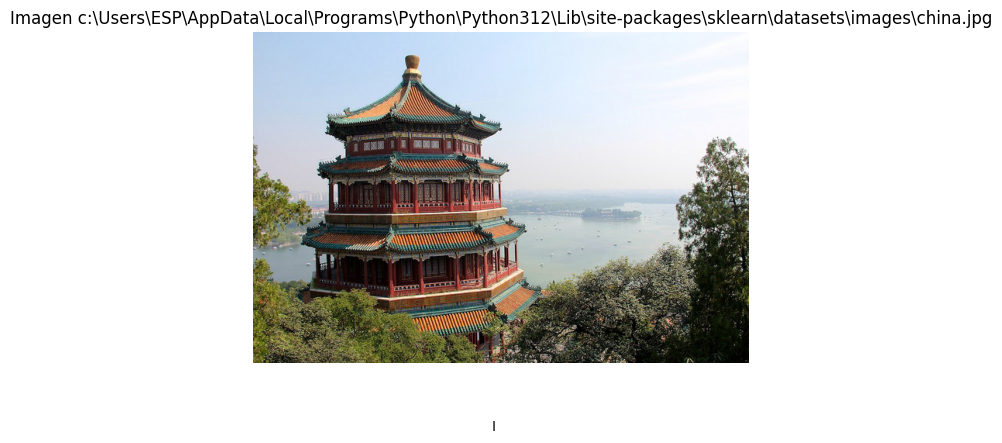

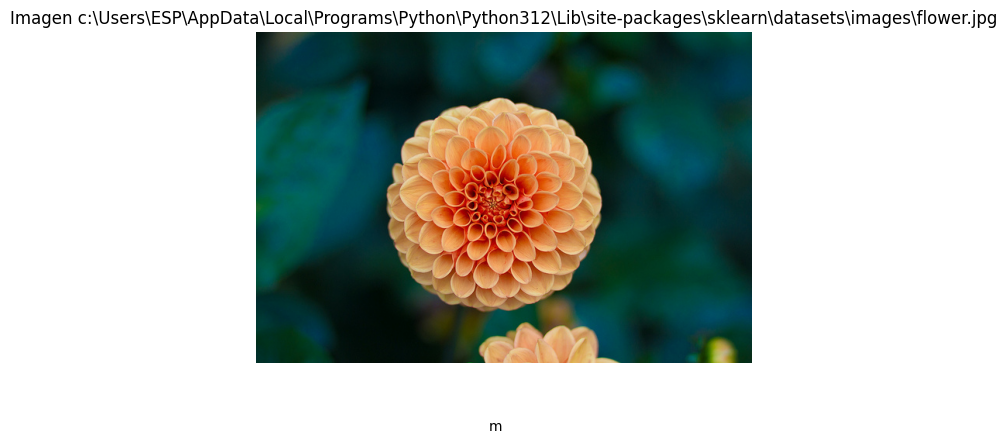

In [17]:
#Escribe las sentencias con las que:
#Descargarías un dataset de openml.org (mira el apartado 7.4.1).
from sklearn.datasets import load_sample_images
import matplotlib.pyplot as plt
#Haz un programa en Python que descargue uno e imprima:
dataset = load_sample_images()
#Cuántos ejemplos tiene.
print(f"Numero de ejemplos: {len(dataset.images)}")
# Cuántas características tiene cada ejemplo
# Tiene 3 caracteristicas (la imagen, el nombre y una descripcion)
#Imprime los datos de los primeros 5 ejemplos.
for i in range (2):
    plt.figure()
    plt.imshow(dataset.images[i])
    plt.title(f"Imagen {dataset.filenames[i]}")
    description = dataset.DESCR[i]
    plt.figtext(0.5, 0.01, description, wrap=True, horizontalalignment='center', fontsize=10)
    plt.axis("off")
    plt.show()


## ACTIVIDAD 2: ANALIZAR DATASET “BREAST CANCER WISCONSIN”.
Las características de cada ejemplo se han calculado a partir de una imagen digitalizada de una masa
tumoral de cáncer de mama. Describen características de la zona tumoral de la imagen. De cada
característica se añade la media ‘mean … ’, el error estándar ‘standard error …’ y el 'worst …' o media
de los 3 valores mayores, generando un total de 30 características. Por ejemplo las mediciones del
radio de la masa son: 'mean radius' (radio medio), 'standard error of the radius' (error estándar del
radio) y 'worst radius' (mayor tri-media). Todas las características se registran con 4 dígitos
significativos. La columna target tiene dos clases (dos posibles valores) que corresponden a las
etiquetas negativa (“Benigno”) y positivo (“Maligno”). Recordaros que maligno en el contexto médico
equivale a que conduce a la muerte. Para realizar las tareas necesitarás todos estos paquetes que
puedes importar ya o a medida que los vayas necesitando, como prefieras: 

In [18]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from collections import OrderedDict 

from sklearn import datasets
from sklearn.preprocessing import label_binarize, LabelBinarizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report, roc_curve, auc
DISPLAY_PRECISION = 4
pd.set_option("display.precision", DISPLAY_PRECISION)


'''
Paso 2.1. Cargamos el dataset de sklearn y describimos las características. Ten en cuenta que el dataset
es un diccionario Python con varias claves y en cada clave tendrá algo. Primero miramos las claves.
'''
#Imprimimos las descripciones
datos = datasets.load_breast_cancer()
#print(datos.DESCR)
#print("------ keys del dataset \"breast cancer\":", datos.keys())

'''
Y a continuación miramos las proporciones de cada clase, creamos un DataFrame de Pandas y se mapea
target a valores 0 y 1. Una vez construido el DataFrame lo describimos.
'''
#Debemos remapear el target para que aparezcan valores numericos 
#Benigno = 0 (clase negativa)
#Maligno = 1 (clase positiva)
li_clases = [datos.target_names[1], datos.target_names[0]]
li_target = [1 if x == 0 else 0 for x in list(datos.target)]
li_predictoras = list(datos.feature_names)
print(f"El target tiene 2 clases: {li_clases}")
print(f"Su distribucion en un total de {len(li_target)} valores es:")
print(pd.Series(li_target).value_counts())

df_todas = pd.DataFrame(datos.data[:,:], columns=li_predictoras)
print("Describimos las 6 primeras columnas del dataframe")
print(df_todas.iloc[:,:6].describe().to_string())

# DIVIDIMOS EL DATASET EN DATOS DE TRAIN Y DATOS DE TEST
RATIO_PARA_TEST = 0.2
X = df_todas
y = pd.Series(li_target)
X_train_0, X_test_0, y_train, y_test = train_test_split(X,y, test_size=RATIO_PARA_TEST, random_state=0)
print(f"X_train_0.shape {X_train_0.shape} e y_train.shape {y_train.shape}")
print(f"X_test_0.shape {X_test_0.shape} e y_test.shape {y_test.shape}")

El target tiene 2 clases: [np.str_('benign'), np.str_('malignant')]
Su distribucion en un total de 569 valores es:
0    357
1    212
Name: count, dtype: int64
Describimos las 6 primeras columnas del dataframe
       mean radius  mean texture  mean perimeter  mean area  mean smoothness  mean compactness
count     569.0000      569.0000         569.000   569.0000         569.0000          569.0000
mean       14.1273       19.2896          91.969   654.8891           0.0964            0.1043
std         3.5240        4.3010          24.299   351.9141           0.0141            0.0528
min         6.9810        9.7100          43.790   143.5000           0.0526            0.0194
25%        11.7000       16.1700          75.170   420.3000           0.0864            0.0649
50%        13.3700       18.8400          86.240   551.1000           0.0959            0.0926
75%        15.7800       21.8000         104.100   782.7000           0.1053            0.1304
max        28.1100       39.280

### ENTREGA 2: Responde a estas preguntas:
<ol>
    <li>
    ¿Qué hace la sentencia? df_todas.iloc[:, :6]
    Coge los valores de todas las filas y las 6 primeras columnas basado en su valor posicional
    </li>
    <li>
    ¿Hay valores ausentes en alguna columna? En este dataframe no hay valores ausentes, ya que lo hemos comprobado con la sentencia df_todas.isnull(), que nos devuelve True en los valores que son nulos o no exiten
    </li>
    <li>
    ¿Hay el mismo número de casos benignos que malignos?
    No hay mas caso beningnos, un total de 357 y un total de 212 de casos malignos 
    ¿Cuál es el % de cada uno? De casos benignos hay un 62,74% y de malignos un 37,25% 
    </li>
</ol>

# ACTIVIDAD 3: REDUCIR CARACTERÍSTICAS.
Usamos dos técnicas del método selección de características:
1. Reducción Univariada (Eliminar bajas correlaciones con el target).
2. Reducción basada colinearidad (para cada pareja de predictoras, si tienen mucha correlación, nos
quedamos con la más correlacionada con el target y quitamos la otra).

** Paso 3.1. Primero hacemos un mapa de calor de las correlaciones: **

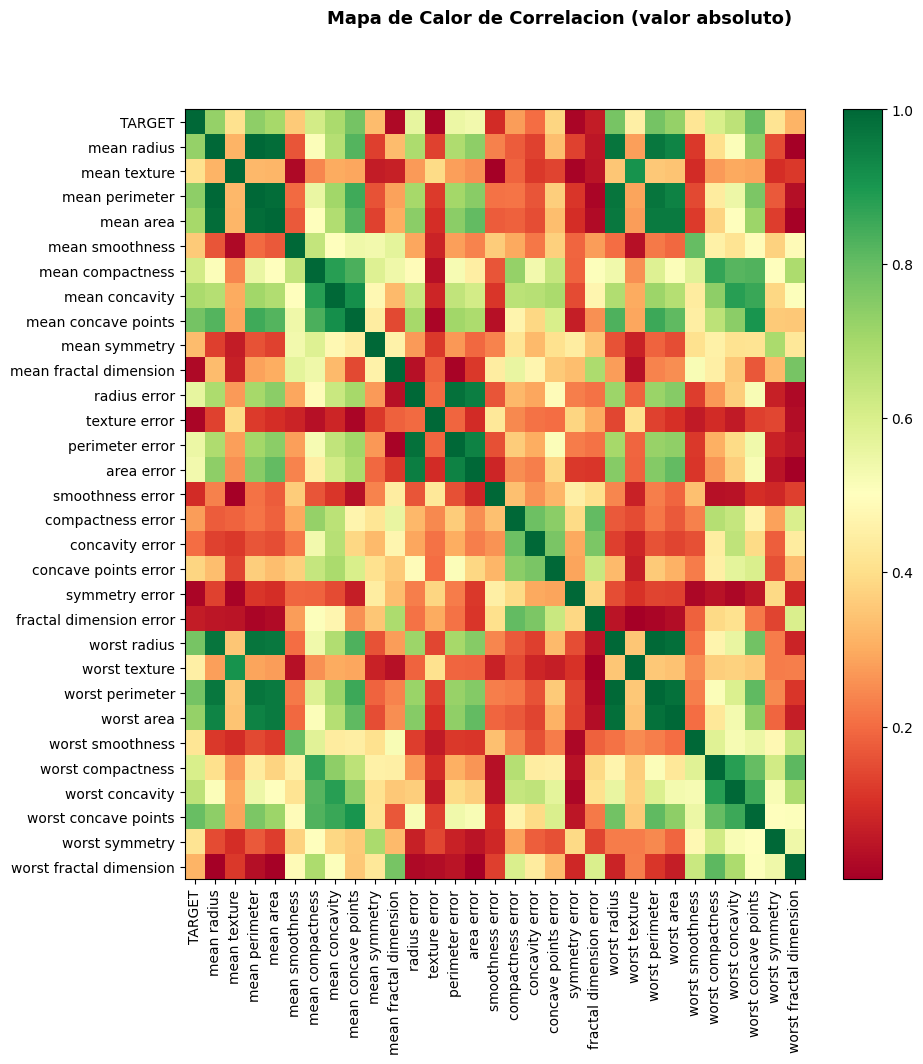

In [19]:
def matriz_correlaciones(y,X,se_dibuja=False):
    '''
    Calcula y dibuja la matriz de correlaciones
    Devuelve:
    yX - datos concatenado
    yC_corr - matriz de correlacioness, correlacion de Person entre [-1, +1]
    yX_abs_corre - matriz de correlaciones en valor absoluto
    '''
    yX = pd.concat([y,X],axis=1)
    yX = yX.rename(columns={0: 'TARGET'})
    #Calcula la matriz y convierte a Dataframe para visualizar mejor
    yX_corr = yX.corr(method='pearson')
    yX_abs_corr = np.abs(yX_corr) #Convierte el valor a absoluto
    if se_dibuja:
        plt.figure(figsize=(10,10))
        plt.imshow(yX_abs_corr,cmap='RdYlGn',interpolation='none', aspect='auto')
        plt.colorbar()
        plt.xticks(range(len(yX_abs_corr)),yX_abs_corr.columns,rotation='vertical')
        plt.yticks(range(len(yX_abs_corr)),yX_abs_corr.columns)
        plt.suptitle('Mapa de Calor de Correlacion (valor absoluto)', fontsize=13, fontweight='bold')
        plt.show()
    return yX, yX_corr, yX_abs_corr

yX, yX_corr, yX_abs_corr = matriz_correlaciones(y_train, X_train_0,se_dibuja=True)



## ENTREGA 3: Responde a estas preguntas:
1. **Entrega el gráfico de la matriz de correlaciones**
2. **Una columna influye en el target si su correlación está cerca del +1 o del -1. Como hemos
dibujado el valor absoluto en los datos, solo puede estar cera del +1 si tiene influencia o del 0 si
no la tiene. Si una columna tiene baja correlación con el target, significa que tienen poca
relación y por tanto no tendrá apenas influencia sobre él, no le afecta. Por tanto eliminarla no
supone una gran pérdida de información para los algoritmos de aprendizaje. Examinando
visualmente la matriz ¿Podrías indicar los nombres de las características que están en ese caso,
es decir, tienen una correlación cercana a cero con el target.**
Las caracteristicas que tienen una correlación cercana a cero con el target son mean fractal dimension, texture error, symmetry error y fractal dimension error.

3. **Examinando visualmente la matriz, ¿es simétrica respecto a la diagonal? Es decir
(caracteristica1 influye en característica2) lo mismo que (característica2 en característica1)?**
    La matriz es simétrica respecto a la diagonal, es decir que (característica1 influye en
    característica2) lo mismo que (característica2 influye en característica1).
4. **¿Qué característica guarda una fuerte correlación con “mean radius” y “mean perimeter”?**
    La característica que guarda una fuerte correlación con "mean radius" y "mean perimeter" es "mean area".

In [20]:
#Reduccion univariada: eliminamos las características que tienen una correlación menor que 0.1 con el target
CORRELACION_MIN = 0.1
#Ordenamos las características por su correlación con el target
s_corr_target = yX_abs_corr['TARGET']
s_corr_target_sort = s_corr_target.sort_values(ascending=False)

#Solo usamos las columnas que tienen una correlación mayor que la correlación mínima > 0.1
s_low_correlation_filter = s_corr_target_sort[s_corr_target_sort <= CORRELACION_MIN]
print(f"Eliminadas {len(s_low_correlation_filter)} características con correlación menor que {CORRELACION_MIN}")
for i,v in enumerate(s_low_correlation_filter):
    print(f"{i:3d}, {np.round(v, DISPLAY_PRECISION)}, {s_low_correlation_filter.index[i]}")
s_corr_target_sort = s_corr_target_sort[s_corr_target_sort > CORRELACION_MIN]
print(f"Quedan {len(s_corr_target_sort) -1} características con correlación mayor que {CORRELACION_MIN}")
for i,v in enumerate(s_corr_target_sort):
    ftr = s_corr_target_sort.index[i]
    if ftr == 'TARGET':
        continue
    print(f"{i:3d}, {np.round(v, DISPLAY_PRECISION)}, {ftr}")

Eliminadas 5 características con correlación menor que 0.1
  0, 0.0918, smoothness error
  1, 0.0618, fractal dimension error
  2, 0.0253, mean fractal dimension
  3, 0.0176, texture error
  4, 0.0144, symmetry error
Quedan 25 características con correlación mayor que 0.1
  1, 0.7934, worst concave points
  2, 0.7758, worst perimeter
  3, 0.7758, mean concave points
  4, 0.7702, worst radius
  5, 0.7365, mean perimeter
  6, 0.7243, mean radius
  7, 0.7242, worst area
  8, 0.6995, mean area
  9, 0.691, mean concavity
 10, 0.6558, worst concavity
 11, 0.6123, mean compactness
 12, 0.5986, worst compactness
 13, 0.5628, radius error
 14, 0.5512, perimeter error
 15, 0.5355, area error
 16, 0.4521, worst texture
 17, 0.4204, worst smoothness
 18, 0.4176, worst symmetry
 19, 0.4093, mean texture
 20, 0.3822, concave points error
 21, 0.3606, mean smoothness
 22, 0.3309, mean symmetry
 23, 0.3176, worst fractal dimension
 24, 0.2752, compactness error
 25, 0.2034, concavity error


In [21]:
# Aplicamos la reducción univariada
CORRELACION_MIN = 0.1
s_corr_target = yX_abs_corr['TARGET']
s_corr_target_sort = s_corr_target.sort_values(ascending=False)

# Solo usamos las columnas que tienen una correlación mayor que la correlación mínima > 0.1
s_low_correlation_filter = s_corr_target_sort[s_corr_target_sort <= CORRELACION_MIN]
print(f"Eliminadas {len(s_low_correlation_filter)} predictoras")

for i,v in enumerate(s_low_correlation_filter):
    print(f"{i:3d}, {np.round(v,DISPLAY_PRECISION)}, {s_low_correlation_filter.index[i]}")

s_corr_target_sort = s_corr_target_sort[s_corr_target_sort > CORRELACION_MIN]
print(f"Quedan {len(s_corr_target_sort) -1} predictoras mayores que {CORRELACION_MIN}")

for i,v in enumerate(s_corr_target_sort):
    ftr = s_corr_target_sort.index[i]
    if ftr == 'TARGET':
        continue
    print(f"{i:3d}, {np.round(v, DISPLAY_PRECISION)}, {ftr}")


Eliminadas 5 predictoras
  0, 0.0918, smoothness error
  1, 0.0618, fractal dimension error
  2, 0.0253, mean fractal dimension
  3, 0.0176, texture error
  4, 0.0144, symmetry error
Quedan 25 predictoras mayores que 0.1
  1, 0.7934, worst concave points
  2, 0.7758, worst perimeter
  3, 0.7758, mean concave points
  4, 0.7702, worst radius
  5, 0.7365, mean perimeter
  6, 0.7243, mean radius
  7, 0.7242, worst area
  8, 0.6995, mean area
  9, 0.691, mean concavity
 10, 0.6558, worst concavity
 11, 0.6123, mean compactness
 12, 0.5986, worst compactness
 13, 0.5628, radius error
 14, 0.5512, perimeter error
 15, 0.5355, area error
 16, 0.4521, worst texture
 17, 0.4204, worst smoothness
 18, 0.4176, worst symmetry
 19, 0.4093, mean texture
 20, 0.3822, concave points error
 21, 0.3606, mean smoothness
 22, 0.3309, mean symmetry
 23, 0.3176, worst fractal dimension
 24, 0.2752, compactness error
 25, 0.2034, concavity error


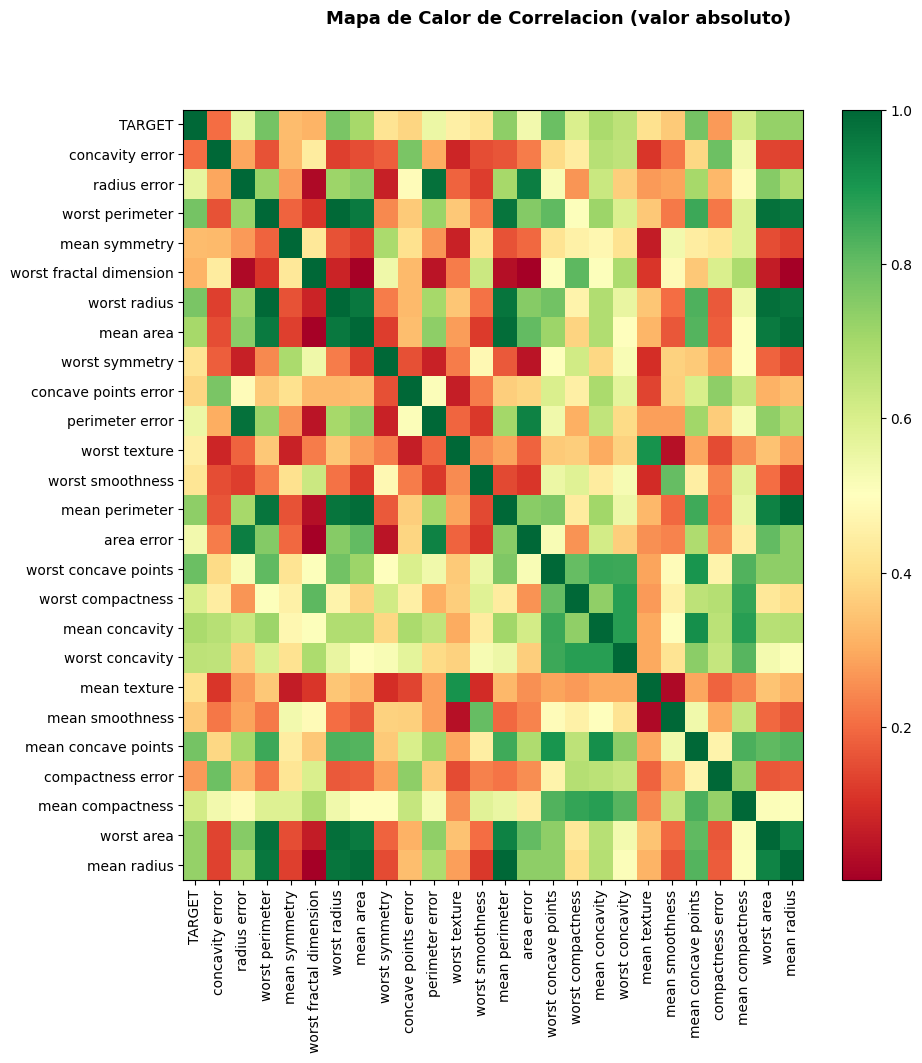

s_parejas.shape (625,)
len(li_corr_parejas) 82
li_clases_corr_parejas[:10] [(np.str_('mean perimeter'), np.str_('mean radius')), (np.str_('mean radius'), np.str_('mean perimeter')), (np.str_('worst perimeter'), np.str_('worst radius')), (np.str_('worst radius'), np.str_('worst perimeter')), (np.str_('mean radius'), np.str_('mean area')), (np.str_('mean area'), np.str_('mean radius')), (np.str_('mean perimeter'), np.str_('mean area')), (np.str_('mean area'), np.str_('mean perimeter')), (np.str_('worst area'), np.str_('worst radius')), (np.str_('worst radius'), np.str_('worst area'))]
Elimnando 16 predictoras (ver ultima columna)
                      var_O                 var_1  coef_0  coef_1      PREDICTORA_A_QUITAR
0            mean perimeter           mean radius  0.7365  0.7243              mean radius
1           worst perimeter          worst radius  0.7758  0.7702             worst radius
2               mean radius             mean area  0.7243  0.6995                mean area


In [22]:
#Eliminar a los de baja correlación del anterior
li_X1_cols = list(set(s_corr_target_sort.index) - set(s_low_correlation_filter.index))
li_X1_cols.remove('TARGET')

#Colineariedad
CORRELACION_MAX = 0.8
X1 = X_train_0[li_X1_cols]
yX1,yX_corr1, yX_abs_corr1 = matriz_correlaciones(y_train, X1, se_dibuja=True)

#Obtener todas las parejas de las predictoras
Xcorr_1 = yX_abs_corr1.iloc[1:, 1:]
s_parejas = Xcorr_1.unstack()
print("s_parejas.shape", s_parejas.shape)
s_parejas = np.round(s_parejas, decimals=DISPLAY_PRECISION)
s_parejas_sorted = s_parejas.sort_values(ascending=False)
s_parejas_sorted = s_parejas_sorted[(s_parejas_sorted != 1) & (s_parejas_sorted > CORRELACION_MAX)]

# Convertir las parejas a listas de nombres
li_corr_parejas = s_parejas_sorted.index.tolist()
print("len(li_corr_parejas)", len(li_corr_parejas))
print("li_clases_corr_parejas[:10]", li_corr_parejas[:10])

# Para cada pareja con alta colineidad eliminamos la de menos correlacion con el target
li_remove_parejas = []
li_remove_puntuaciones = []

for tup in li_corr_parejas:
    s0 = s_corr_target_sort.loc[tup[0]]
    s1 = s_corr_target_sort.loc[tup[1]]
    remove_predictora = tup[1] if s1 < s0 else tup[0]
    if remove_predictora not in li_remove_parejas:
        li_remove_parejas.append(remove_predictora)
        di = { 'var_O':tup[0], 'var_1':tup[1], 'coef_0':s0, 'coef_1':s1, 'PREDICTORA_A_QUITAR':remove_predictora}
        li_remove_puntuaciones.append(OrderedDict(di))

df_remove_puntuaciones = pd.DataFrame(li_remove_puntuaciones)

#Eliminamos predictoras encontradas 
print("Elimnando %d predictoras (ver ultima columna)" % len(li_remove_parejas))
print(df_remove_puntuaciones.to_string())
li_X2_cols = list(set(li_X1_cols)- set(li_remove_parejas))
li_X2_cols.sort()

print("Quedan %d predictoras "% len(li_X2_cols))
for i,v in enumerate (s_corr_target_sort):
    ftr = s_corr_target_sort.index[i]
    if ftr in li_X2_cols:
        print(i, np.round(v,DISPLAY_PRECISION),ftr)




### ENTREGA 4: Responde a esta pregunta (puedes ejecutar el código para ayudarte):
a)**Cuando tenemos dos columnas predictoras con una capacidad predictiva muy parecida, por
ejemplo “mean radius” se correlaciona con el target en 0.7108 y la predictora “perimeter” se
correlaciona con target 0.7240. ¿Estas dos columnas están correlacionadas entre sí?**
Si estan correlacionadas entre si dado que ambas están altamente correlacionadas con el mismo objetivo (**target**)

b) **Si es el caso y queremos eliminar una ¿Cuál se debe eliminar?** 
La decisión de cuál eliminar depende de varios factores:

1- Interpretabilidad: Si una de las variables es más fácil de interpretar en el contexto del problema, generalmente se prefiere mantener esa variable.
2- Importancia predictiva:
Puedes verificar cuál de las dos variables tiene mayor importancia en el modelo. 
3- Evitar colinealidad:
Si usas un modelo lineal como regresión logística o regresión lineal, elimina una de las columnas para reducir la colinealidad, ya que afecta los coeficientes y la estabilidad del modelo.

Tras la reduccion con parejas X2.shape (455, 9)
Las Remaining features
['TARGET', np.str_('worst concave points'), np.str_('radius error'), np.str_('worst texture'), np.str_('worst smoothness'), np.str_('worst symmetry'), np.str_('concave points error'), np.str_('mean symmetry'), np.str_('compactness error'), np.str_('concavity error')]
-----
Tras la reduccion con parejas X3.shape (455, 9)


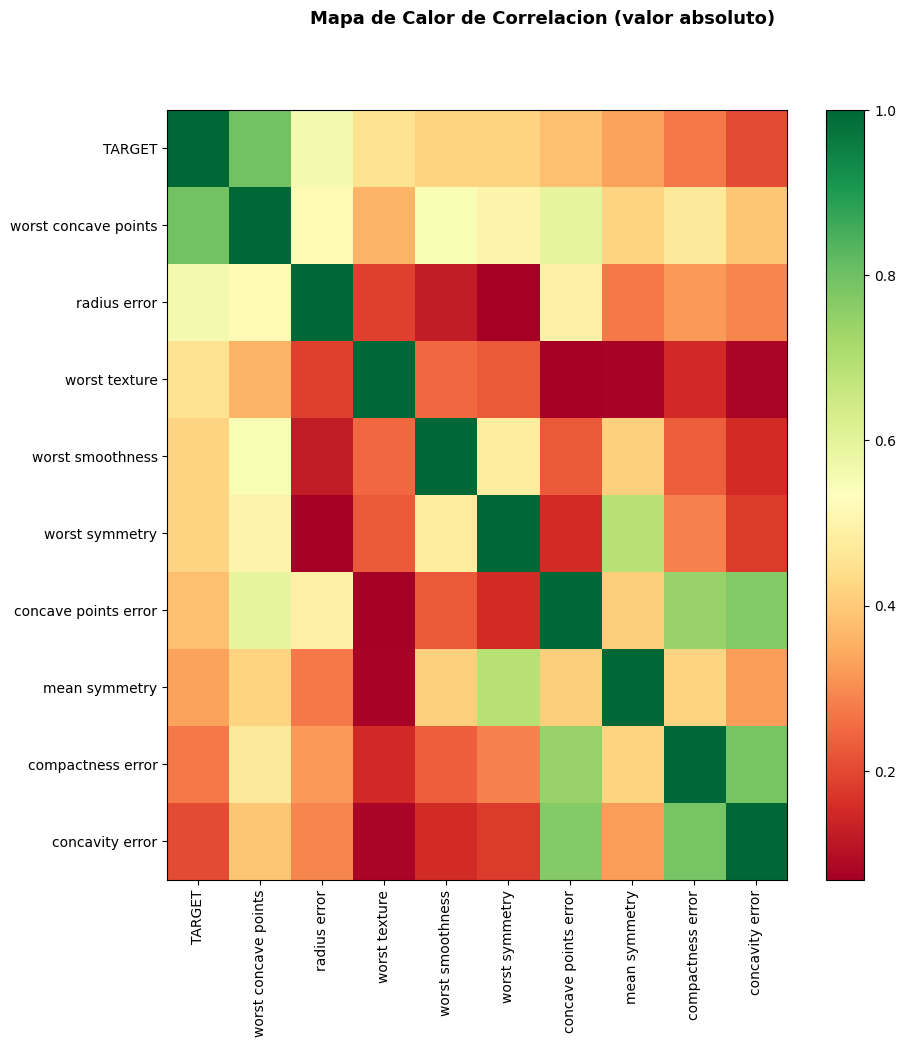

c:\Users\ESP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:2219: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): rug.
  warnings.warn(msg, UserWarning)


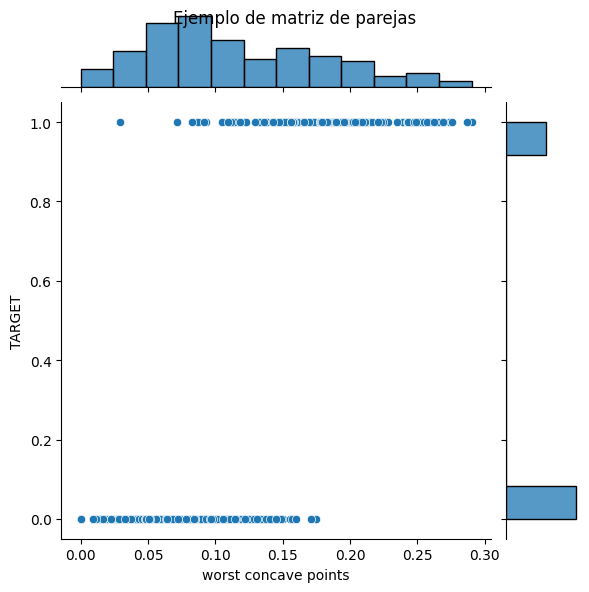

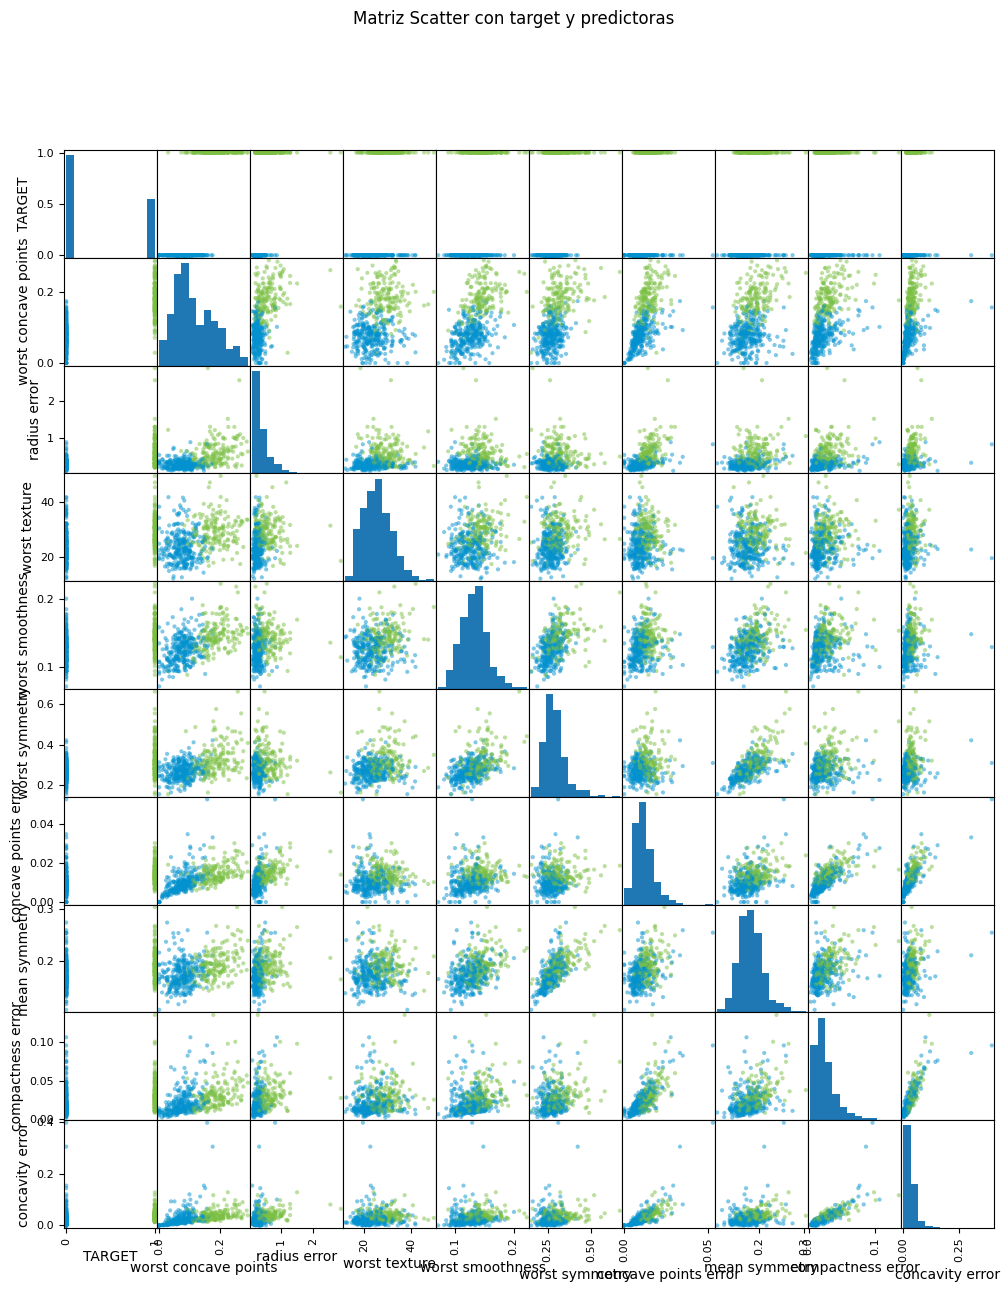

In [23]:
# Calcula la matriz de correlaciones
X2 = X1[li_X2_cols]
print("Tras la reduccion con parejas X2.shape", X2.shape)
yX2, yX_corr2, yX_abs_corr2 = matriz_correlaciones(y_train, X2)
s_X3_cols = yX_abs_corr2["TARGET"].sort_values(ascending=False)
li_X3_cols = s_X3_cols.index.tolist()
print("Las Remaining features")
print(li_X3_cols)
print("-----")

li_X3_cols.remove('TARGET')
X3 = X2[li_X3_cols]
print("Tras la reduccion con parejas X3.shape", X3.shape)
yX3, yX_corr3, yX_abs_corr3 = matriz_correlaciones(y_train, X3, se_dibuja=True)
X_train = X3
X_test = X_test_0[li_X3_cols]

sns.jointplot(yX3,x='worst concave points', y='TARGET', kind='scatter',marginal_kws=dict(bins=12, rug=True))
plt.suptitle('Ejemplo de matriz de parejas')

mapa_colores = {0:'#0392cf', 1:'#7bc043'}
colores = yX3['TARGET'].map(lambda x: mapa_colores.get(x))
pd.plotting.scatter_matrix(yX3, alpha=0.5, color=colores, figsize=(12,14), diagonal='hist', hist_kwds={'bins':12})

plt.suptitle('Matriz Scatter con target y predictoras')
plt.show()


### ENTREGA 5: Entrega la matriz de gráficos scatter y responde:
a) Si estas son las predictoras más influyentes en el target ¿Qué porcentaje son de las 30 que
teníamos inicialmente? Son un 30% del total de las predictoras.
b) Entrega el gráfico.

## ACTIVIDAD 4. CREAR DOS MODELOS DE CLASIFICACIÓN.
Clasificar los datos usando dos diferentes tipos de modelos:
1. Modelo de Regresión Logística.
2. GBM – Modelo Boosting por Gradiente


In [24]:
#  Comprobar el balanceo de los datos.
print(f"==== X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}")

# Ditribucion de clases de TARGET en train y model
val_cnts = y_train.value_counts()
print("Distribucion de ejemplos positivos y negativos en el train:")
print(val_cnts)

print("Porcentaje de positivos: %s" % "%2f%%" % (100 * val_cnts[1] / len(y_train)))
print(f"==== X_test.shape: {X_test.shape}, y_test.shape: {y_test.shape}")
val_cnts = y_test.value_counts()

print("Distribucion de ejemplos positivos y negativos en el test:")
print("Porcentaje de positivos: %s" % "%2f%%" % (100 * val_cnts[1] / len(y_test)))


==== X_train.shape: (455, 9), y_train.shape: (455,)
Distribucion de ejemplos positivos y negativos en el train:
0    290
1    165
Name: count, dtype: int64
Porcentaje de positivos: 36.263736%
==== X_test.shape: (114, 9), y_test.shape: (114,)
Distribucion de ejemplos positivos y negativos en el test:
Porcentaje de positivos: 41.228070%


### ENTREGA 6: A la vista de los resultados:
a) **¿Los datos están balanceados?**
No, los datos no están completamente balanceados.
La clase positiva representa aproximadamente el 39.08% en el conjunto de entrenamiento y el 35.44% en el conjunto de prueba, mientras que la clase negativa ocupa el resto. Un conjunto de datos balanceado tendría una distribución más equitativa (50% positivos y 50% negativos).
b) **¿Es lógico porque se corresponde con lo que puedes encontrar en la vida real?**
Sí, es lógico.
En muchos problemas reales, como detección de enfermedades, fraudes, etc., las clases suelen estar desbalanceadas porque los eventos positivos (como detectar una enfermedad o un fraude) son menos frecuentes que los negativos.
c) **Las proporciones de cada clase en train y test ¿Son similares?**
Sí, las proporciones son bastante similares:
En train, los positivos son el 39.08%.
En test, los positivos son el 35.44%.
Aunque no son idénticas, están lo suficientemente cerca como para considerar que la partición mantuvo la distribución original de las clases.
d) **Si necesitamos datasets muy balanceados se lo podemos pedir a las funciones que
particionan los datos. ¿Cómo se llama la técnica que lo realiza? (marca la opción correcta):
 (X) Estratificación ( ) Validación cruzada. ( ) Ingeniería de características ( ) ADAM**

In [25]:
# Dibujar un mapa de calor para el proceso gridsearch de un modelo
def plot_2d_grid_search_heatmap(grid_search, grid_params, x_param, y_param, is_verbose=True):
    '''
    Dibuja un mapa de calor 2D para el proceso gridsearch de un modelo.
    Parametros:
        grid_search: instancia de un objeto sklearnGridSearchCV
        grid_params: diccionario con los parámetros del gridsearch
        x_param: nombre del parámetro eje x del grid_params
        y_param: nombre del parámetro eje y del grid_params
        is_verbose(opcional): indica si se imprime información detallada durante el proceso (imprime resultado)
    Return:
        grid_search.best_score: mejor puntacion encontrada
        grid_search.best_iterator_: mejor estimador encontrado
    '''

    grid_params_x = grid_params[x_param]
    grid_params_y = grid_params[y_param]
    df_result = pd.DataFrame(grid_search.cv_results_)
    ar_scores = np.array(df_result.mean_test_score).reshape(len(grid_params_y), len(grid_params_x))
    sns.heatmap(ar_scores, annot=True, fmt='.3f',xticklabels=grid_params_x, yticklabels=grid_params_y)
    plt.suptitle('Mapa de calor Grid Search')
    plt.xlabel(x_param)
    plt.ylabel(y_param)

    if is_verbose:
        print('Mejor puntación:', grid_search.best_score_)
        print('Mejor estimador:', grid_search.best_estimator_)
    plt.show()
    return grid_search.best_score_, grid_search.best_estimator_

c:\Users\ESP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ESP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
-------------------------------------------------------------------

Mejor puntación: 0.9516483516483516
Mejor estimador: LogisticRegression(C=1000, class_weight='balanced', max_iter=200, n_jobs=1,
                   random_state=0)


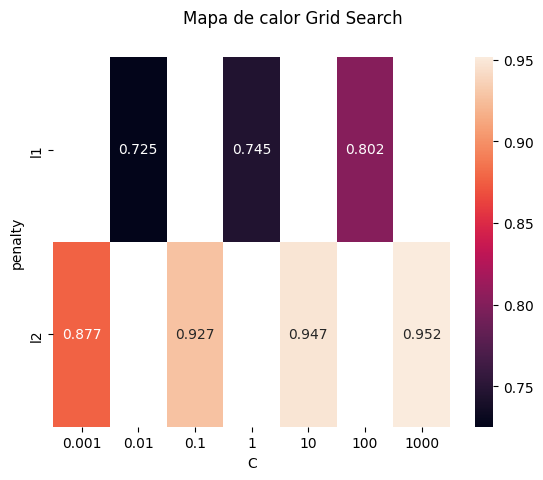

==== Atributo del Clasificador Regresión Logística ====
intercept: [-20.86235699]
Coeficientes: [[ 77.59002661  16.1490818    0.28138403 -18.4280385   19.57744639
  -13.1410181  -18.65360224 -46.18892832 -13.12709997]]


In [26]:
# Implementar Clasificador con Regresión Logística.

grid_rl = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}
cla_rl = LogisticRegression(class_weight='balanced', dual=False, fit_intercept=True, intercept_scaling=1,
                            max_iter=200, n_jobs=1, random_state=0, tol=0.0001, verbose=0, warm_start=False)
gs_rl = GridSearchCV(cla_rl, grid_rl, return_train_score=True)
# Se realiza por defecto validacion cruzada 3-fold

#Entrar el modelo
gs_rl.fit(X_train, y_train)

best_score_rl, cla_rl = plot_2d_grid_search_heatmap(gs_rl, grid_rl, 'C', 'penalty')
print("==== Atributo del Clasificador Regresión Logística ====")
print("intercept:", cla_rl.intercept_)
print("Coeficientes:", cla_rl.coef_)

### ENTREGA 7: A la vista del mapa de calor de grid-search y de los datos mostrados por consola:
**a) ¿Qué valor de hace que se obtenga una puntuación más alta (el modelo funciona mejor)?**
 El valor de C que se obtiene una puntuación más alta es C=1000 que es de 0.947
 La puntuación más alta se obtiene con una regularización L2 (penalty='l2').
**b) ¿Significa que no se debe usar regularización?**
 No se debe usar regularización cuando se quiere obtener un modelo que generalice mejor.
**c) Cuando aplicamos restricciones al algoritmo que configura un modelo, elige:
- ( ) Le damos libertad
- ( ) Le quitamos libertad
- ( ) Hacemos que el modelo generalice mejor
- ( ) Hacemos que el modelo generalice peor
- (X) Es mejor hacerlo cuando el modelo es demasiado complejo y tiene overfitting.
- ( ) Es mejor hacerlo cuando el modelo es demasiado simple y tiene underfitting.**
**d) ¿Qué parámetros configuran al modelo?**
 Los parámetros configuran al modelo son: C, que es el parámetro de regularización y penalty, que es la forma de regularización (l1 o l2).
**e) ¿Con qué hiperparámetros se han calculado esos parámetros?**
 Los hiperparámetros se han calculado con validación cruzada 3-fold para cada combinación de C y penalty.

In [27]:
# Implementar el Clasificador GBM
grid_gb = {'min_samples_leaf': [2,4,8,16], 'learning_rate':[0.001, 0.01, 0.1]}
cla_gb = GradientBoostingClassifier(criterion='friedman_mse', init=None, loss='log_loss', max_features='sqrt',
                                    max_leaf_nodes=None, max_depth=3, warm_start=False, min_impurity_decrease=0.0,
                                    min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=800,
                                    random_state=0, subsample=1.0, verbose=0)

# Por defect usa 3-fold cross-validation
gs_gb = GridSearchCV(cla_gb, grid_gb, verbose=0, return_train_score=True)

# Entrenar el modelo
gs_gb.fit(X_train, y_train)

best_score_gb, cla_gb = plot_2d_grid_search_heatmap(gs_gb, grid_gb,'min_samples_leaf', 'learning_rate')


KeyboardInterrupt: 

### ENTREGA 8: A la vista del mapa de calor de grid-search:

**a) ¿La mejor puntuación es mejor o peor que la mejor alcanzada por la Regresión Lineal?**
No, la mejor puntuación es peor que la mejor alcanzada por la Regresión Lineal.

**b) ¿Y el rango de [mínima puntuación, máxima_puntuación]?**
El rango de [mínima puntuación, máxima puntuación] es mejor que la Regresión Lineal.

**c) Si cambiamos el valor de la constante RATIO_PARA_TEST de 0.5 a 0.2, particionamos el
80% de los datos para train. Hazlo y repite la ejecución. ¿Cómo queda ahora la máxima
puntuación? ¿Mejora a la Regresión Lineal? ¿El intervalo [peor, mejor]?**
Queda mejor que la Regresión Lineal. El intervalo [peor, mejor] es mejor


**d) ¿Alguno de los dos parámetros no influye cuando se alcanza la mejor puntuación? O dicho
de otro modo ¿Hay algún valor óptimo de uno de los dos parámetros?**
Si el learning_rate es 0.01 y min_samples_leaf es 2, no influye cuando se alcanza la mejor puntuación.


**e) Cuando usamos GridSearchCV() también debemos usar la función Pipeline() para
preprocesar los datos antes de hacer la validación cruzada para entrenar el modelo, algo así
como esto: tuberia_de_operaciones = Pipeline([(‘nombre_preproceso1', preproceso1),
(‘nombre_modelo', modelo)]) ¿Usamos esto en el código?**
 No, no se utiliza la función Pipeline() en el código.

## ACTIVIDAD 5. VALIDAR EL MODELO.
La importancia que tiene cada característica (la información que aporta sobre el problema o la
influencia que tiene para que el modelo tome sus decisiones) varía de un modelo a otro. 

In [ ]:
# Calcular la matriz de confusión de los dos modelos.
# Regresion lineal
dfimp = pd.DataFrame(np.std(X_train,0), columns=['std'])
dfimp['coef'] = cla_rl.coef_.T
dfimp['lr_sign_imp'] = (np.std(X_train,0).ravel() * cla_rl.coef_).T
dfimp['lr_imp'] = np.abs(dfimp['lr_sign_imp'])

# GBM
dfimp['gb_imp'] = pd.Series(cla_gb.feature_importances_, X_train.columns)
# Añadir una columna para la correlacion con el target
dfimp['target_corr'] = s_X3_cols.drop('TARGET')

# Rango desde altos a bajos valores de importancia
dfimp['lr_rank'] = dfimp['lr_imp'].rank(ascending=False)
dfimp['gb_rank'] = dfimp['gb_imp'].rank(ascending=False)
dfimp['target_corr_rank'] = dfimp['target_corr'].rank(ascending=False)

dfsort = dfimp.sort_values('target_corr_rank', ascending=True)
print(dfsort.iloc[:20,:].to_string())
cols_top = dfsort.index[:7]

print("[y_test, X_test]")
yX_test = pd.concat([y_test.iloc[-10:], X_test[cols_top].iloc[-10:,:]], axis=1)
yX_test = yX_test.rename(columns={0: 'TARGET'})
print(yX_test.to_string())

li_cas = ['cla_rl', 'cla_gb']
dfp = pd.DataFrame(index=['TARGET'], data=[y_test]).T
for s_cla in li_cas:
    print("Modelo"+ s_cla)
    print("-------------")
    cla = eval(s_cla)
    y_pred = cla.predict(X_test).astype(int)
    y_score = cla.predict_proba(X_test)
    s_class = "%s_class" % s_cla
    s_proba = "%s_proba" % s_cla
    s_rank = "%s_rank" % s_cla
    dfp[s_class] = y_pred
    dfp[s_proba] = y_score[:,1]
    dfp[s_rank] = dfp[s_proba].rank(ascending=1).astype(int)

    '''
    Imprime una matriz de confusión y el informe de clasificacion
    desde sklearn.metrics importa la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    Pandas 'crosstab' muestra mejor esta matriz
    '''
    cm = pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predicción'], margins=True)
    print(cm)

                         std     coef  lr_sign_imp  lr_imp  gb_imp  target_corr  lr_rank  gb_rank  target_corr_rank
worst concave points  0.0652  77.5900       5.0627  5.0627  0.4705       0.7934      1.0      1.0               1.0
radius error          0.2841  16.1491       4.5873  4.5873  0.2110       0.5628      2.0      2.0               2.0
worst texture         6.0939   0.2814       1.7147  1.7147  0.0963       0.4521      3.0      3.0               3.0
worst smoothness      0.0226 -18.4280      -0.4165  0.4165  0.0301       0.4204      7.0      7.0               4.0
worst symmetry        0.0629  19.5774       1.2319  1.2319  0.0370       0.4176      4.0      6.0               5.0
concave points error  0.0059 -13.1410      -0.0774  0.0774  0.0458       0.3822      9.0      5.0               6.0
mean symmetry         0.0274 -18.6536      -0.5105  0.5105  0.0095       0.3309      6.0      9.0               7.0
compactness error     0.0175 -46.1889      -0.8079  0.8079  0.0187      

C:\Users\ESP\AppData\Local\Temp\ipykernel_17048\77139678.py:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  dfimp['lr_sign_imp'] = (np.std(X_train,0).ravel() * cla_rl.coef_).T


Modelo: cla_rl
-------------
Matriz de Confusión (crosstab):
Predicción   0   1  All
Real                   
0           63   4   67
1            3  44   47
All         66  48  114


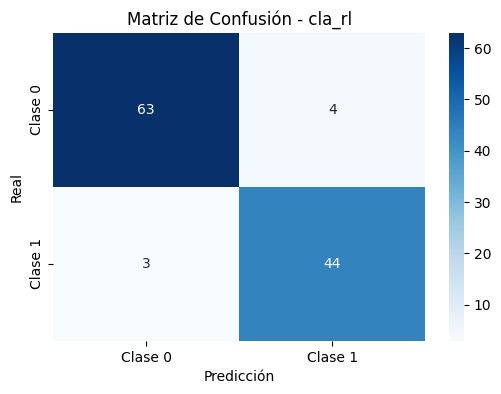

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95        67
           1       0.92      0.94      0.93        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



Modelo: cla_gb
-------------
Matriz de Confusión (crosstab):
Predicción   0   1  All
Real                   
0           67   0   67
1            5  42   47
All         72  42  114


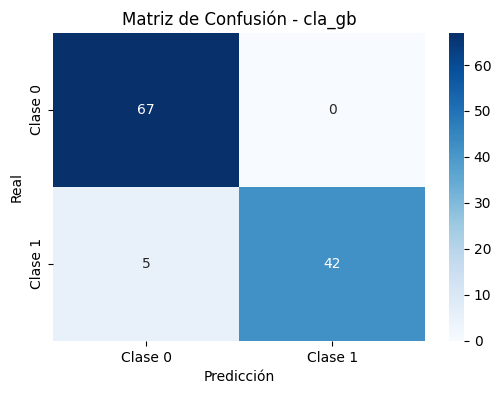

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        67
           1       1.00      0.89      0.94        47

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114





In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Bucle para imprimir matrices de confusión e informes de clasificación para ambos modelos
for s_cla in li_cas:
    print(f"Modelo: {s_cla}")
    print("-------------")
    cla = eval(s_cla)
    y_pred = cla.predict(X_test).astype(int)

    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Mostrar la matriz de confusión con pandas crosstab
    cm_crosstab = pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predicción'], margins=True)
    print("Matriz de Confusión (crosstab):")
    print(cm_crosstab)

    # Visualización con Seaborn
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
    plt.title(f'Matriz de Confusión - {s_cla}')
    plt.ylabel('Real')
    plt.xlabel('Predicción')
    plt.show()

    # Generar y mostrar el informe de clasificación
    print("Informe de Clasificación:")
    print(classification_report(y_test, y_pred))
    print("\n")


### ENTREGA 10: Una vez ejecutado el código:
a) Entrega una captura del informe del modelo de Regresión Lineal.
b) Lo mismo para el modelo GBM.

In [ ]:
'''
Dividir los datos en Bins percentiles, es decir, definir 10 grupos (bins) uno para cada
posible intervalo de scores, y ver cuantos datos caen dentro de cada bin. El rango de puntuaciones
estará limitada por 'score_min' a 'score_max'
'''

RANGO_BINS = 10
rango_cols = ['i_bin', 'i_bin_min', 'i_max_bin', 'score_bin', 'score_max', 'bin_cnt', 'pos_cnt', 'pos_rate']
rango_cols2 = ['i_bin', 'score_min', 'score_max', 'tnr', 'fpr', 'fnr', 'tpr', 'tn', 'fp', 'fn', 'tp']
print(dfp.shape)
len_test = dfp.shape[0]
len_bin = int(len_test / RANGO_BINS)

for s_cla in li_cas:
    i_min_bin = 0
    i_max_bin = 0
    dfr = pd.DataFrame(columns=rango_cols)
    dfr2 = pd.DataFrame(columns=rango_cols2)
    s_class = "%s_class" % s_cla
    s_proba = "%s_proba" % s_cla
    s_rank = "%s_rank" % s_cla

    for i in range(RANGO_BINS):
        if i == RANGO_BINS - 1:
            i_max_bin = len_test
        else:
            i_max_bin += len_bin
        # Rango usado para cada bin de puntuaciones
        df_rng = dfp[(dfp[s_rank] >= i_min_bin) & (dfp[s_rank] < i_max_bin)]
        score_min = np.min(df_rng[s_proba])
        score_max = np.max(df_rng[s_proba])
        bin_cnt = df_rng.shape[0]
        pos_cnt = len(df_rng[df_rng['TARGET'] == 1])
        pos_rate = pos_cnt / bin_cnt

        # Rango usado para todo los bins hasta i_max_bin
        df_rng_0 = dfp[dfp[s_rank] < i_max_bin]
        df_rng_1 = dfp[dfp[s_rank] >= i_max_bin]

        # Target positivos (tp = true positivos, fn= false negativos)
        tp = len(df_rng_1[df_rng_1['TARGET'] == 1])
        fn = len(df_rng_0[df_rng_0['TARGET'] == 1])

        pos = tp + fn
        tpr = tp / pos 
        fnr = 1 - tpr

        # Target negativos (tn = true negativos, fp= false positivos)
        tn = len(df_rng_0[df_rng_0['TARGET'] == 0])
        fp = len(df_rng_1[df_rng_1['TARGET'] == 0])

        neg = tn + fp
        fpr = fp / neg
        tnr = 1 - fpr

        # Hacer que el dataframe para resumen de estadisticas con bin
        row = [i, i_min_bin, i_max_bin, score_min, score_max, bin_cnt, pos_cnt, pos_rate]
        dfr.loc[i] = row

        # Hacer el dataframe para las estadisticas ROC por bin
        row2 = [i, score_min, score_max, tnr, fpr, fnr, tpr, tn, fp, fn, tp]
        dfr2.loc[i] = row2

        i_min_bin = i_max_bin #Preparar la siguiente iteración
    
    if s_cla == 'cla_rl':
        dfr_lr = dfr.copy()
        dfr2_lr = dfr2.copy()
    elif s_cla == 'cla_gb':
        dfr_gb = dfr.copy()
        dfr2_gb = dfr2.copy()
    else: 
        print(f"Error: Modelo {s_cla} no encontrado.")
        break

print("\nResultados de contadores estadisticos positivos por bin")
print("Estadisticas Regresión Logistica:")
print(dfr_lr.to_string())
print("-------------")
print("Estaditicas de GBM")
print(dfr_gb.to_string())
print("-----------------")
print("Estadisticas globales en el test set:")
pos_cnt = len(dfp[dfp['TARGET'] == 1])
pos_rate = pos_cnt / len_test
print("pos_cnt", pos_cnt)
print("total filas:", len_test)
print("pos_rate", pos_rate)

(114, 7)

Resultados de contadores estadisticos positivos por bin
Estadisticas Regresión Logistica:
   i_bin  i_bin_min  i_max_bin   score_bin   score_max  bin_cnt  pos_cnt  pos_rate
0    0.0        0.0       11.0  1.1330e-06  9.2893e-05     10.0      0.0    0.0000
1    1.0       11.0       22.0  1.5464e-04  7.4713e-04     11.0      0.0    0.0000
2    2.0       22.0       33.0  9.3717e-04  3.1325e-03     11.0      0.0    0.0000
3    3.0       33.0       44.0  4.2099e-03  9.2474e-03     11.0      0.0    0.0000
4    4.0       44.0       55.0  1.1241e-02  3.5592e-02     11.0      1.0    0.0909
5    5.0       55.0       66.0  4.1207e-02  3.6121e-01     11.0      2.0    0.1818
6    6.0       66.0       77.0  4.3717e-01  9.6296e-01     11.0      6.0    0.5455
7    7.0       77.0       88.0  9.7479e-01  9.9908e-01     11.0     11.0    1.0000
8    8.0       88.0       99.0  9.9930e-01  9.9983e-01     11.0     11.0    1.0000
9    9.0       99.0      114.0  9.9997e-01  1.0000e+00     15.0     15

ENTREGA 11: Ejecuta el código y:
a) Entrega una captura de los datos que genera.

C:\Users\ESP\AppData\Local\Temp\ipykernel_17048\673495198.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right')


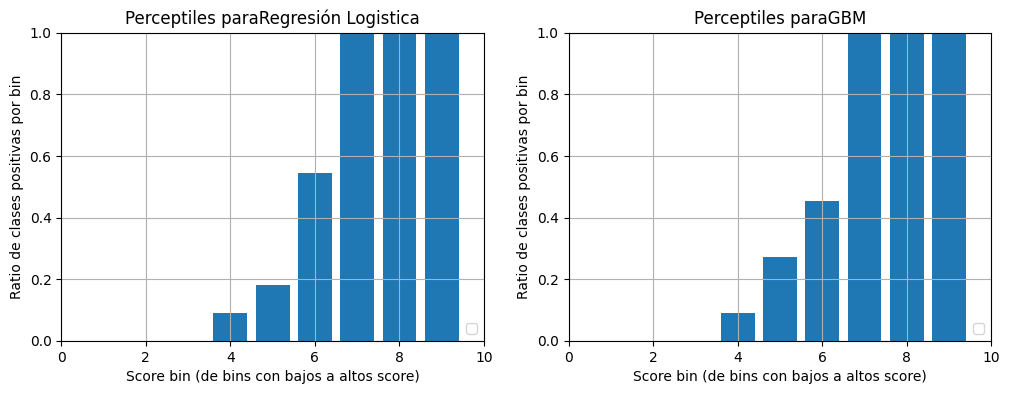

In [ ]:
# Paso 5.4. Dibujar el ratio de clases positivas por cada bin.
s_titulos = ['Regresión Logistica', 'GBM']
plt.figure(figsize=(12, 4))

for i, s_cla in enumerate(li_cas):
    s_titulo = s_titulos[i]
    if s_cla == 'cla_rl':
        dfr = dfr_lr
        dfr2 = dfr2_lr
    elif s_cla == 'cla_gb':
        dfr = dfr_gb
        dfr2 = dfr2_gb
    else:
        print(f"Error: Modelo {s_cla} no encontrado.")
        break
    
    plt.subplot(1, 2, i+1)
    plt.bar(dfr['i_bin'], dfr['pos_rate'])
    plt.title('Perceptiles para' + s_titulo)
    plt.grid()
    plt.xlabel('Score bin (de bins con bajos a altos score)')
    plt.ylabel('Ratio de clases positivas por bin')
    plt.legend(loc='lower right')
    plt.xlim([0, RANGO_BINS])
    plt.ylim([0.0, 1])
plt.show()

### ENTREGA 12: Ejecuta el código y:
a) Entrega una captura de los gráficos datos que imprime.
b) ¿Hay algún modelo de los que hemos usado que tenga un comportamiento monótono?
El modelo de GBM parece tener un comportamiento monótono, ya que la tasa de clases positivas en cada bin parece seguir una tendencia ascendente.



Resultados de estadisticas ROC por bin
Estadisticas Regresión Logistica:
   i_bin   score_min   score_max     tnr     fpr     fnr     tpr    tn    fp    fn    tp
0    0.0  1.1330e-06  9.2893e-05  0.1493  0.8507  0.0000  1.0000  10.0  57.0   0.0  47.0
1    1.0  1.5464e-04  7.4713e-04  0.3134  0.6866  0.0000  1.0000  21.0  46.0   0.0  47.0
2    2.0  9.3717e-04  3.1325e-03  0.4776  0.5224  0.0000  1.0000  32.0  35.0   0.0  47.0
3    3.0  4.2099e-03  9.2474e-03  0.6418  0.3582  0.0000  1.0000  43.0  24.0   0.0  47.0
4    4.0  1.1241e-02  3.5592e-02  0.7910  0.2090  0.0213  0.9787  53.0  14.0   1.0  46.0
5    5.0  4.1207e-02  3.6121e-01  0.9254  0.0746  0.0638  0.9362  62.0   5.0   3.0  44.0
6    6.0  4.3717e-01  9.6296e-01  1.0000  0.0000  0.1915  0.8085  67.0   0.0   9.0  38.0
7    7.0  9.7479e-01  9.9908e-01  1.0000  0.0000  0.4255  0.5745  67.0   0.0  20.0  27.0
8    8.0  9.9930e-01  9.9983e-01  1.0000  0.0000  0.6596  0.3404  67.0   0.0  31.0  16.0
9    9.0  9.9997e-01  1.0000e+00  1.

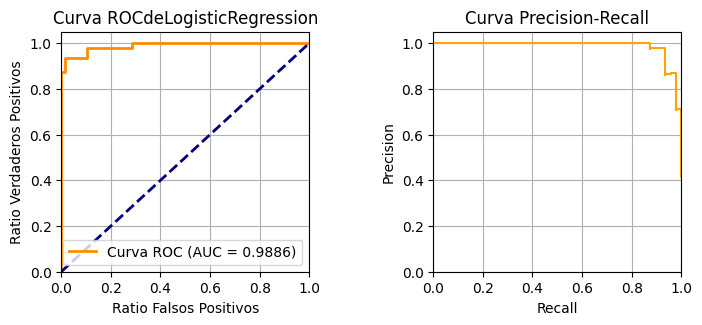

-------------

Modelo: cla_gb
-------------


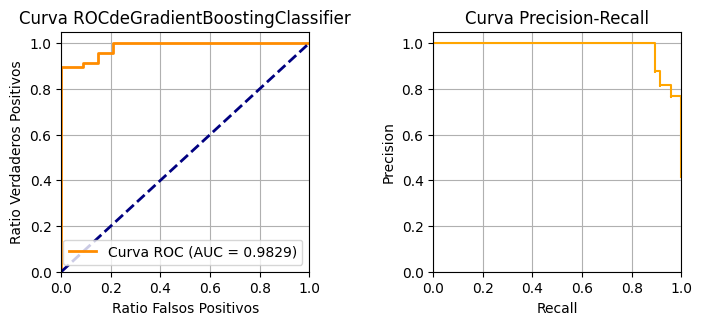

-------------


In [ ]:
# Paso 5.5. Imprimir datos estadísticos de cada bin y dibujar las curvas ROC y precisión contra recall.
print("\nResultados de estadisticas ROC por bin")
print("Estadisticas Regresión Logistica:")
print(dfr2_lr.to_string())

print("-------------")
print("Estadisticas de GBM:")
print(dfr2_gb.to_string())

def plot_roc_y_precicion_recall(y_true, y_score, modelo=None):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr) # Calcula ROC y AUC usando FPR y TPR
    precision, recall, _ = precision_recall_curve(y_true, y_score)
    plt.figure(figsize=(8, 3))
    plt.subplot(1, 2, 1)
    lw = 2

    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='Curva ROC (AUC = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Ratio Falsos Positivos')
    plt.ylabel('Ratio Verdaderos Positivos')
    titulo = 'Curva ROC'
    if modelo != None:
        titulo = titulo +'de'+ modelo.__class__.__name__
    plt.title(titulo)
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.subplot(1, 2, 2)
    plt.step(recall, precision, color='orange', where='post')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Curva Precision-Recall')
    plt.grid(True)
    plt.subplots_adjust(0.125, 0.1, 0.9, 0.9, 0.5, 0.2)
    plt.show()


for s_cla in li_cas:
    print("\nModelo:", s_cla)
    print("-------------")
    cla = eval(s_cla)
    y_pred = cla.predict_proba(X_test).astype(int)
    y_score = cla.predict_proba(X_test)
    plot_roc_y_precicion_recall(y_test, y_score[:, 1], cla)
    print("-------------")

Por resumir lo que hemos hecho en esta práctica que ha consistido en realizar algunas tareas típicas en la preparación de un modelo de ML:

 - Usando técnicas de selección de características al final hemos usado 9 de las 30 iniciales.
 - Hemos creado sos modelos de clasificación (Regresión logística y GBM) y hemos encontrado sus hiperparámetros óptimos usando GridSearchCV.
 - Hemos calculado un ranking de importancia de las características para cada modelo.
 - Hemos medido y comparado ambos con la curva ROC y la de precisión vs recall.
 - Hemos cambiado TEST_SIZE_RATIO=0.2 y eso mejora a GBM porque lo vuelve más estable.

### ACTIVIDAD 6. HAZ ALGO PARECIDO CON OTRO DATASET 

1. Cuando todos hayamos rellenado el fichero, puedes descargarlo como un .csv y cargarlo.

2. Haz algún procesamiento como quitar la columna nombre al dataset. Escoge una columna que te sirva para clasificar a los alumnos usando el resto de columnas. Por ejemplo: tiene_alergias, lleva_gafas, o incluso una numérica podrías transformarla en dos clases CAFÉS_DÍA si es mayor de 0 es SI (1) y si es cero es No (0). O tomas poco entre 0 y 2 y muchos entre 3 o más. Lo que se te ocurra.

3. Indica el target que has elegido y transforma los datos si necesitas hacerlo.

4. Haz un procesamiento similar al que hemos realizado al dataset original:

- Estudia si puedes eliminar características para el clasificador.

- Crea dos modelos clasificadores (pueden ser los mismos).

- Configura sus hiperparámetros (al tener muy pocos datos posiblemente tengan overfitting).

- Estudia el resultado de compararlos y sus curvas ROC, su AUC y precisión-recall.

Regresión Logística:
[[1 2]
 [0 2]]
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.50      1.00      0.67         2

    accuracy                           0.60         5
   macro avg       0.75      0.67      0.58         5
weighted avg       0.80      0.60      0.57         5

Gradient Boosting Machine
[[1 2]
 [1 1]]
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.33      0.50      0.40         2

    accuracy                           0.40         5
   macro avg       0.42      0.42      0.40         5
weighted avg       0.43      0.40      0.40         5



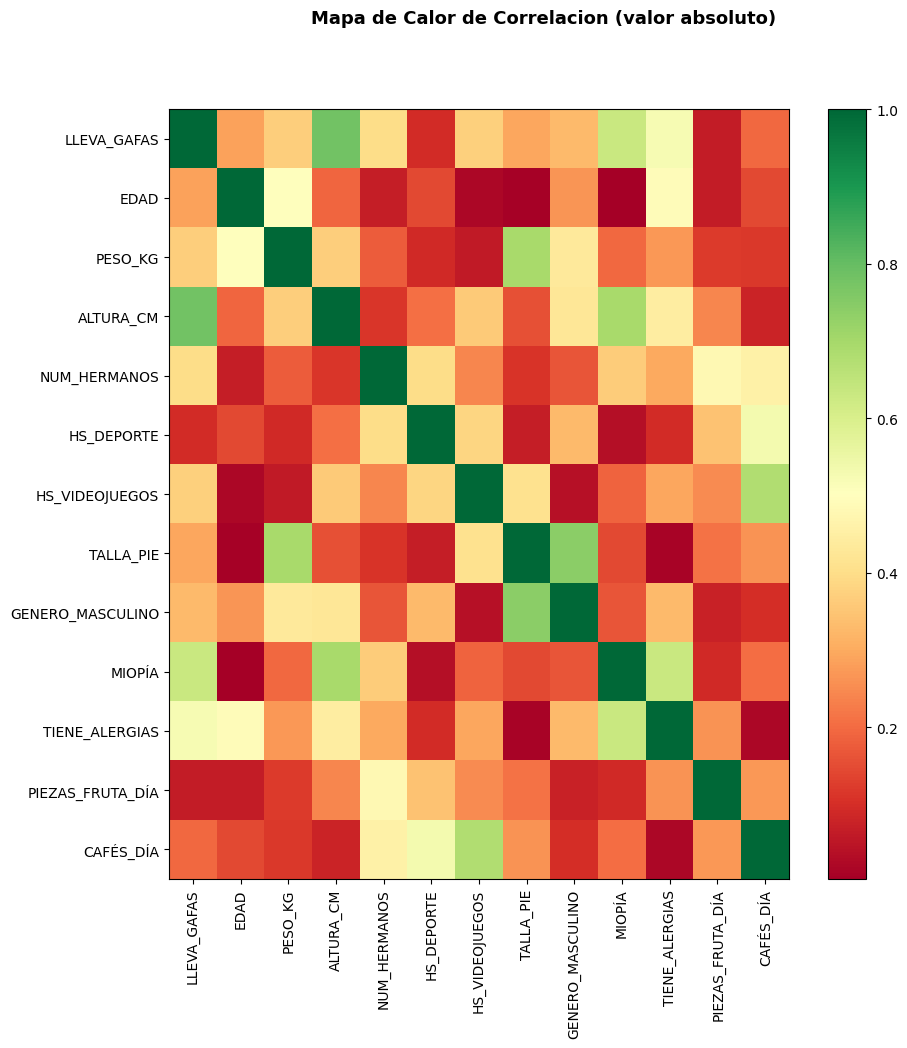

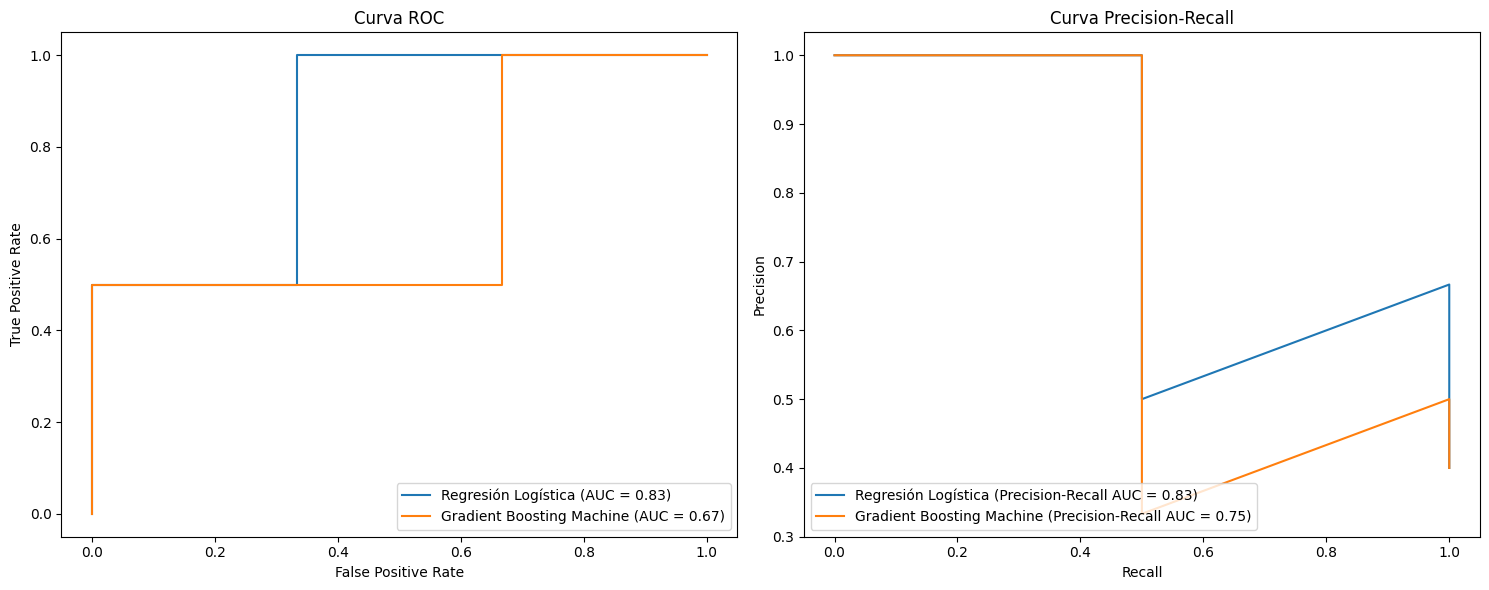


=== Regresión Logística ===
Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.50      1.00      0.67         2

    accuracy                           0.60         5
   macro avg       0.75      0.67      0.58         5
weighted avg       0.80      0.60      0.57         5

ROC AUC: 0.83
Precision-Recall AUC: 0.83

=== Gradient Boosting Machine ===
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.33      0.50      0.40         2

    accuracy                           0.40         5
   macro avg       0.42      0.42      0.40         5
weighted avg       0.43      0.40      0.40         5

ROC AUC: 0.67
Precision-Recall AUC: 0.75


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score, classification_report
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('alumnos.csv', encoding='utf-8')

# Mostrar los primeros 5 filas del dataset
print(df.head())

print(df.info())

print(df.describe())



# Seleccion de variables predictoras

X = df.drop(columns=['NOMBRE','LLEVA_GAFAS']) # Eliminamos Variables no predictoras y target (nos quedamos con las variables predictoras)
# Variable objetivo (target)
y = df['LLEVA_GAFAS']


# Correlacion entre variables predictoras y la variable objetivo
df = df.drop(columns=['NOMBRE'])
correlations = df.corr()
print(correlations["LLEVA_GAFAS"].sort_values(ascending=False))

# Dividimos el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creamos y entrenamos los modelos clasificadores
# Creamos un modelo de regresión logística
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train, y_train)

# Creamos un modelo de GBM
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)

# Calculamos las predicciones
logistic_pred = logistic_regression.predict(X_test)
gbm_pred = gbm.predict(X_test)


# Evaluamos los modelos
print("Regresión Logística:")
print(confusion_matrix(y_test, logistic_pred))
print(classification_report(y_test, logistic_pred))

print("Gradient Boosting Machine")
print(confusion_matrix(y_test, gbm_pred))
print(classification_report(y_test, gbm_pred))

yX, yX_corr, yX_abs_corr = matriz_correlaciones(y_train, X_train,se_dibuja=True)

# Calculamos las curvas ROC y precisión-recall
models = {'Regresión Logística': logistic_regression, 'Gradient Boosting Machine': gbm}
result = {}
plt.figure(figsize=(15, 6))


for i, (name,model) in enumerate(models.items(),start=1):
    #Prediccion de probabilidad
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Curva ROC y AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    result[name] = {'ROC AUC': roc_auc}

    # Curva Precision-Recall
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    average_precision = average_precision_score(y_test, y_pred_proba)
    result[name]['Precision-Recall AUC'] = average_precision

    # Graficas
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.title('Curva ROC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f'{name} (Precision-Recall AUC = {average_precision:.2f})')
    plt.title('Curva Precision-Recall')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

# Informe de clasificación
for name, model in models.items():
    print(f"\n=== {name} ===")
    y_pred = model.predict(X_test)
    print("Informe de Clasificación:")
    print(classification_report(y_test, y_pred))
    print(f"ROC AUC: {result[name]['ROC AUC']:.2f}")
    print(f"Precision-Recall AUC: {result[name]['Precision-Recall AUC']:.2f}")

